# Project 1
#### Raghunathan Ramnath and Dilip Ganesan

###### Dataset:  Bitcoin Alpha trust weighted signed network

This is who-trusts-whom network of people who trade using Bitcoin on a platform called Bitcoin Alpha. 
Since Bitcoin users are anonymous, there is a need to maintain a record of users' reputation to prevent transactions with fraudulent and risky users. Members of Bitcoin Alpha rate other members in a scale of -10 (total distrust) to +10 (total trust) in steps of 1. This is the first explicit weighted signed directed network available for research.

https://snap.stanford.edu/data/soc-sign-bitcoinalpha.html



##### Project:

For the purpose of this project, we will analyze the network, centrality and other characteristics.

Nodes: 3,783

Edges:  14,124

Categorical Variables: Rating is our categorical variable which is numeric and range from -10 to 10. 
                       We will split the Positive values as one Category and Negative values as another.

##### Loading: 
Data is in csv format and will be loaded via python. 
It has the following four columns 

SOURCE- The user who is doing the rating.

TARGET- The user who is being rated

RATING- The rating given to the user

TIME- What time the rating actually happened.


In [30]:

# Loading the packages needed for this project
%matplotlib inline
import networkx as nx
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from __future__ import division
from operator import itemgetter
from tabulate import tabulate

In [31]:
# Reading the data into a pandas data frame
bitc_df = pd.read_csv('https://raw.githubusercontent.com/raghu74us/DATA-620/master/Project1/soc-sign-bitcoinalpha.csv',header=None,names=['Source','Target','Rating','Time'])
#bitc_df = bitc_df.drop(columns = ['Time']) #not required


In [32]:
del bitc_df['Time'] # Time is not required for our analysis. So we drop that column.

In [33]:
# Quick look at the data
bitc_df.head(5)


,Source,Target,Rating
0,7188,1,10
1,430,1,10
2,3134,1,10
3,3026,1,10
4,3010,1,10


In [34]:
bitc_df.tail(5)

,Source,Target,Rating
24181,7604,7601,10
24182,7601,7604,10
24183,7604,7602,10
24184,7602,7604,10
24185,7604,7603,-10


In [35]:
bitc_df.describe()

,Source,Target,Rating
count,24186.000000,24186.000000,24186.000000
mean,864.029314,1051.093815,1.463946
std,1592.085638,1871.765504,2.903656
min,1.000000,1.000000,-10.000000
25%,58.000000,66.000000,1.000000
50%,238.000000,279.000000,1.000000
75%,898.000000,1068.000000,2.000000
max,7604.000000,7604.000000,10.000000


### Analysis:

In [37]:
bitc_net = nx.from_pandas_edgelist(bitc_df, source ='Source', target ='Target', edge_attr = 'Rating')
bitc_net.number_of_edges()

14124

In [38]:
bitc_net.number_of_nodes()

3783

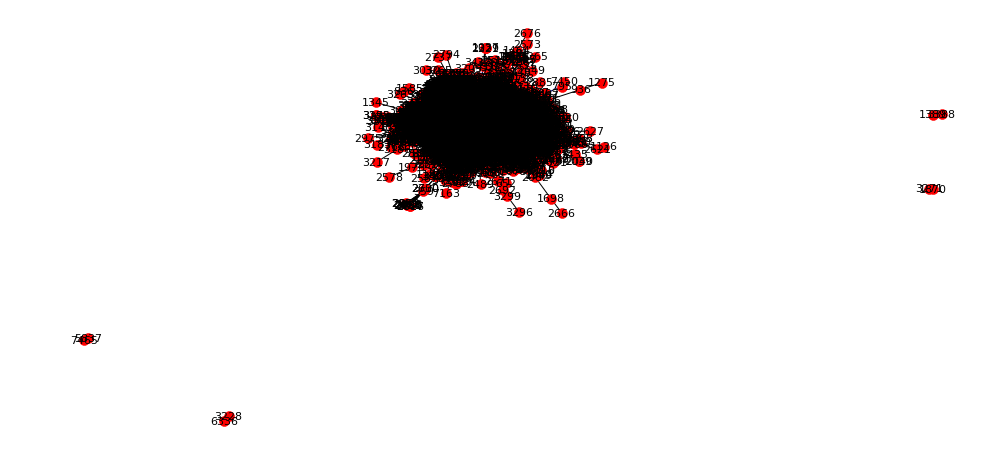

In [13]:
epos=[(u,v) for (u,v,d) in bitc_net.edges(data=True) if d['Rating'] >=0]
eneg=[(u,v) for (u,v,d) in bitc_net.edges(data=True) if d['Rating'] <0]
pos=nx.spring_layout(bitc_net)
#plt.subplot(3,1,1)
plt.figure(figsize=(17,8))
nx.draw_networkx_nodes(bitc_net,pos,node_size=100)

# edges
nx.draw_networkx_edges(bitc_net,pos,edgelist=epos,
                    width=1)
nx.draw_networkx_edges(bitc_net,pos,edgelist=eneg,
                    width=1,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(bitc_net,pos,font_size=11,font_family='sans-serif')

plt.axis('off')
plt.show()

### Degree Centrality

Degree centrality, which is defined as the number of links incident upon a node (i.e., the number of ties that a node has). 


In [40]:
deg = nx.degree(bitc_net)
deg_list = list(deg)
print('The maximum degree in the network is: '+str(max(deg_list,key=itemgetter(1))[1]))
print('The minimum degree in the network is: ' +str(min(deg_list,key=itemgetter(1))[1]))

The maximum degree in the network is: 511
The minimum degree in the network is: 1


In [41]:
iso_list = nx.isolates(bitc_net)
print('The number of isolates in the network are: '+ str(len(list(iso_list))))

The number of isolates in the network are: 0


### Top 10 list of degree centrality:

In [43]:
sorted_deg_list = sorted(deg_list, key=lambda tup: tup[1], reverse=True)
print(tabulate(sorted_deg_list[0:10], headers = ['UserID', 'Degree'],tablefmt='grid'))

+----------+----------+
|   UserID |   Degree |
+==========+==========+
|        1 |      511 |
+----------+----------+
|        8 |      279 |
+----------+----------+
|        3 |      263 |
+----------+----------+
|        2 |      239 |
+----------+----------+
|       11 |      238 |
+----------+----------+
|        7 |      234 |
+----------+----------+
|      177 |      229 |
+----------+----------+
|        4 |      221 |
+----------+----------+
|       15 |      213 |
+----------+----------+
|        5 |      190 |
+----------+----------+


###  Top 10 list of closeness:

closeness centrality (or closeness) of a node is the average length of the shortest path between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes.


In [44]:
close = nx.closeness_centrality(bitc_net)
sorted_close = sorted(close.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_close[0:10], headers = ['UserID', 'Closeness'],tablefmt='grid'))

+----------+-------------+
|   UserID |   Closeness |
+==========+=============+
|        2 |    0.445946 |
+----------+-------------+
|       11 |    0.437248 |
+----------+-------------+
|        1 |    0.423481 |
+----------+-------------+
|       10 |    0.418168 |
+----------+-------------+
|       22 |    0.412714 |
+----------+-------------+
|       95 |    0.408019 |
+----------+-------------+
|        4 |    0.407445 |
+----------+-------------+
|        9 |    0.405428 |
+----------+-------------+
|       15 |    0.404513 |
+----------+-------------+
|       26 |    0.403516 |
+----------+-------------+


The closeness points that appear in centrality are 2,11,1,4,15.

 ### Top 10 list of betweenness:
 
   Betweenness is a centrality measure of a vertex within a graph. Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes.


In [119]:
btwn = nx.betweenness_centrality(bitc_net)
sorted_btwn = sorted(btwn.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_btwn[0:10], headers = ['UserID', 'Betweenness'],tablefmt='grid'))

+----------+---------------+
|   UserID |   Betweenness |
+==========+===============+
|        1 |     0.177799  |
+----------+---------------+
|        2 |     0.0736655 |
+----------+---------------+
|        8 |     0.0629794 |
+----------+---------------+
|        4 |     0.0580725 |
+----------+---------------+
|       11 |     0.0552314 |
+----------+---------------+
|       15 |     0.0549427 |
+----------+---------------+
|        3 |     0.049057  |
+----------+---------------+
|       13 |     0.0420899 |
+----------+---------------+
|       10 |     0.0400261 |
+----------+---------------+
|      177 |     0.0388168 |
+----------+---------------+


### Top 10 list of Eigenvector:

Eigenvector centrality (also called eigencentrality) is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

In [19]:
eigen = nx.eigenvector_centrality(bitc_net)
sorted_eigen = sorted(eigen.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_eigen[0:10], headers = ['UserID', 'Eigen Vector'],tablefmt='grid'))

+----------+----------------+
|   UserID |   Eigen Vector |
+==========+================+
|       11 |       0.193242 |
+----------+----------------+
|        2 |       0.173989 |
+----------+----------------+
|      177 |       0.166268 |
+----------+----------------+
|        3 |       0.158632 |
+----------+----------------+
|        7 |       0.154777 |
+----------+----------------+
|        8 |       0.151178 |
+----------+----------------+
|       26 |       0.147398 |
+----------+----------------+
|        1 |       0.136455 |
+----------+----------------+
|       95 |       0.130958 |
+----------+----------------+
|       24 |       0.129486 |
+----------+----------------+


The high degree centrality like 4, 15 and 5 does not appear in the high degree eigen vector list. Conversely high degree of eigen vectors like 26, 95 and 24 does not appear in high degree centrality.

### Sub-networks by Trust

We can now analyze the trust score, -10 to most untrustworthy to +10 for most trustworthy. I am interested in analyzing the highly influential network for which i consider Positive with Rating > 5.

###  Highly Positive Sub-network.

Network with Rating > 5.

In [20]:
btc_pos = bitc_df.loc[bitc_df['Rating'] > 5]
print(btc_pos.head())

   Source  Target  Rating
0    7188       1      10
1     430       1      10
2    3134       1      10
3    3026       1      10
4    3010       1      10


In [21]:
bitc_pos_net = nx.from_pandas_edgelist(btc_pos, source ='Source', target ='Target', edge_attr = 'Rating')
print("Number of Edges in the positive network: "+str(bitc_pos_net.number_of_edges()))
print("Number of Node in the positive network: "+str(bitc_pos_net.number_of_nodes()))
pos_deg = nx.degree(bitc_pos_net)
pos_deg_list = list(pos_deg)
print('The maximum degree in the network is: '+str(max(pos_deg_list,key=itemgetter(1))[1]))
print('The minimum degree in the newowrk is: ' +str(min(pos_deg_list,key=itemgetter(1))[1]))
sorted_pos_deg_list = sorted(pos_deg_list, key=lambda tup: tup[1], reverse=True)
print(tabulate(sorted_pos_deg_list[0:10], headers = ['UserID', 'Degree'],tablefmt='grid'))
pos_eigen = nx.eigenvector_centrality(bitc_pos_net)
sorted_pos_eigen = sorted(pos_eigen.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_pos_eigen[0:10], headers = ['UserID', 'Eigen Vector'],tablefmt='grid'))


Number of Edges in the positive network: 879
Number of Node in the positive network: 725
The maximum degree in the network is: 53
The minimum degree in the newowrk is: 1
+----------+----------+
|   UserID |   Degree |
+==========+==========+
|        2 |       53 |
+----------+----------+
|      177 |       25 |
+----------+----------+
|        4 |       24 |
+----------+----------+
|        5 |       21 |
+----------+----------+
|        6 |       21 |
+----------+----------+
|       20 |       17 |
+----------+----------+
|        9 |       17 |
+----------+----------+
|       11 |       16 |
+----------+----------+
|        7 |       16 |
+----------+----------+
|     7604 |       16 |
+----------+----------+
+----------+----------------+
|   UserID |   Eigen Vector |
+==========+================+
|        2 |       0.513013 |
+----------+----------------+
|       20 |       0.237412 |
+----------+----------------+
|        9 |       0.233388 |
+----------+----------------+
|       

Only 6% of the network has rating more than 5. Its interesting to notice that 6, 20, 9 and 7604 are not part of 
top 10 list of degree centrality of the entire network and on the other hand only 2 is appearing in the Top 10 list of eigen vector. 

We will plot 2 which is the top most of the highly positive network and 6 thats not appearing in Top 10 list of degree centrality of the entire network.

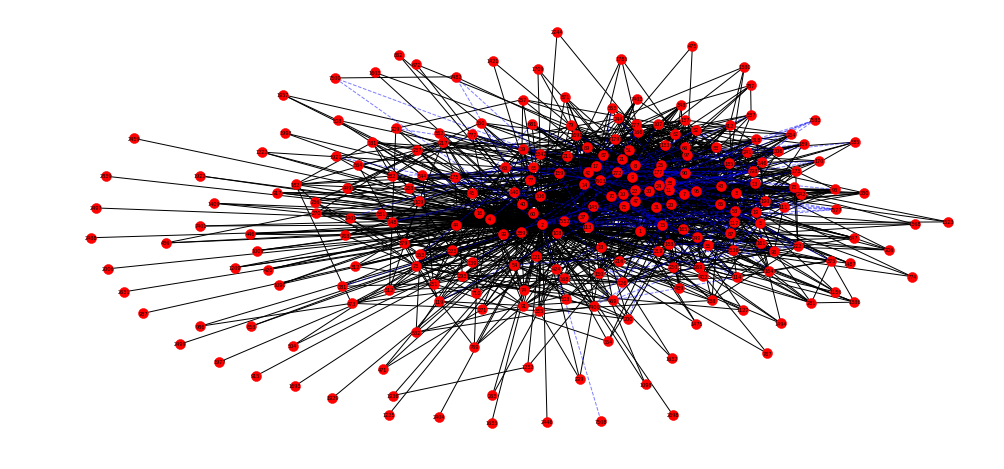

In [22]:
user2 = nx.ego_graph(bitc_net,2)
epos=[(u,v) for (u,v,d) in user2.edges(data=True) if d['Rating'] >=0]
eneg=[(u,v) for (u,v,d) in user2.edges(data=True) if d['Rating'] <0]
pos=nx.spring_layout(user2)
#plt.subplot(3,1,1)
plt.figure(figsize=(17,8))
nx.draw_networkx_nodes(user2,pos,node_size=100)

# edges
nx.draw_networkx_edges(user2,pos,edgelist=epos,
                    width=1)
nx.draw_networkx_edges(user2,pos,edgelist=eneg,
                    width=1,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(user2,pos,font_size=5,font_family='sans-serif')

plt.axis('off')
plt.show()

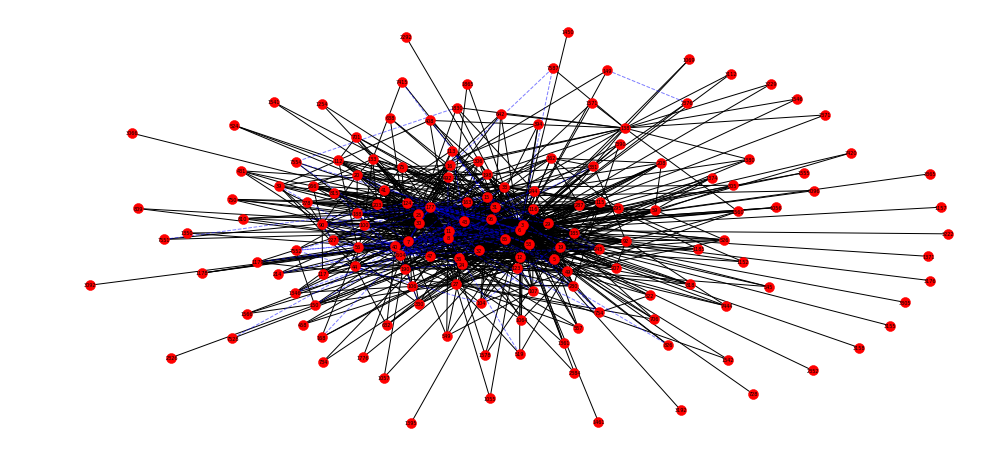

In [23]:
user6 = nx.ego_graph(bitc_net,6)
epos=[(u,v) for (u,v,d) in user6.edges(data=True) if d['Rating'] >=0]
eneg=[(u,v) for (u,v,d) in user6.edges(data=True) if d['Rating'] <0]
pos=nx.spring_layout(user6)
#plt.subplot(3,1,1)
plt.figure(figsize=(17,8))
nx.draw_networkx_nodes(user6,pos,node_size=100)

# edges
nx.draw_networkx_edges(user6,pos,edgelist=epos,
                    width=1)
nx.draw_networkx_edges(user6,pos,edgelist=eneg,
                    width=1,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(user6,pos,font_size=5,font_family='sans-serif')

plt.axis('off')
plt.show()

comparing the graph of user2 and user6, user2 is more dense which justifies on the centrality and closeness and why user6 has higher rating but not appearing in the top 10 degree centrality.

###  Highly Negative Sub-network.

Since only 20% of the entire network attributes to Highly positive rating, We will explore the rating less than -5.

In [24]:
btc_neg = bitc_df.loc[bitc_df['Rating'] < -5]
print(btc_neg.tail())

       Source  Target  Rating
24158    7595    7556     -10
24161    7564    7596     -10
24164    7595    7604     -10
24172    7598    7603     -10
24185    7604    7603     -10


In [25]:
btc_neg_net = nx.from_pandas_edgelist(btc_neg, source ='Source', target ='Target', edge_attr = 'Rating')
print("Number of Edges in the negative network(<-5): "+str(btc_neg_net.number_of_edges()))
print("Number of Node in the negative network (<-5): "+str(btc_neg_net.number_of_nodes()))


Number of Edges in the negative network(<-5): 776
Number of Node in the negative network (<-5): 549


We will explore the user7596 and see how they look like.

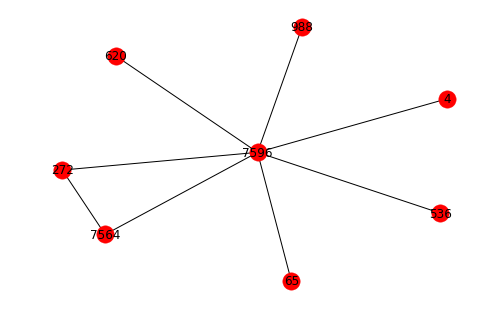

In [26]:
# will explore 7596 as it showed up in the tail. .
user7596 = nx.ego_graph(btc_neg_net,7596)
nx.draw(user7596,with_labels = True)
plt.show()

In [27]:
neg_deg = nx.degree(btc_neg_net)
neg_deg_list = list(neg_deg)
print('The maximum degree in the negative network is: '+str(max(neg_deg_list,key=itemgetter(1))[1]))
print('The minimum degree in the negative nework is: ' +str(min(neg_deg_list,key=itemgetter(1))[1]))
sorted_neg_deg_list = sorted(neg_deg_list, key=lambda tup: tup[1], reverse=True)
print(tabulate(sorted_neg_deg_list[0:10], headers = ['UserID', 'Degree'],tablefmt='grid'))
neg_eigen = nx.eigenvector_centrality(bitc_pos_net)
sorted_neg_eigen = sorted(neg_eigen.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_neg_eigen[0:10], headers = ['UserID', 'Eigen Vector'],tablefmt='grid'))

The maximum degree in the negative network is: 67
The minimum degree in the negative nework is: 1
+----------+----------+
|   UserID |   Degree |
+==========+==========+
|     7604 |       67 |
+----------+----------+
|        5 |       40 |
+----------+----------+
|      177 |       38 |
+----------+----------+
|        7 |       34 |
+----------+----------+
|     7603 |       31 |
+----------+----------+
|       11 |       27 |
+----------+----------+
|     7564 |       25 |
+----------+----------+
|     5342 |       20 |
+----------+----------+
|       30 |       20 |
+----------+----------+
|       43 |       19 |
+----------+----------+
+----------+----------------+
|   UserID |   Eigen Vector |
+==========+================+
|        2 |       0.513013 |
+----------+----------------+
|       20 |       0.237412 |
+----------+----------------+
|        9 |       0.233388 |
+----------+----------------+
|        4 |       0.230455 |
+----------+----------------+
|     7603 |       0

Will plot the graph for user 177.

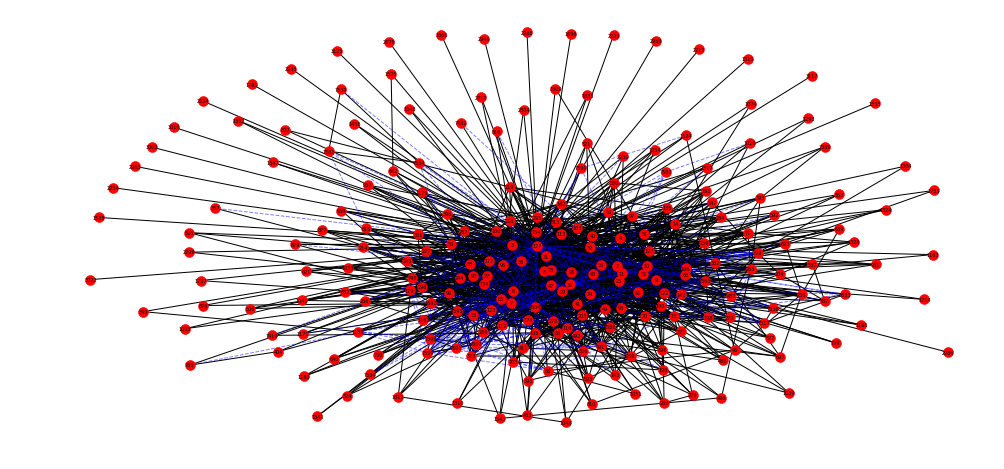

In [29]:
user177 = nx.ego_graph(bitc_net,177)
epos=[(u,v) for (u,v,d) in user177.edges(data=True) if d['Rating'] >=0]
eneg=[(u,v) for (u,v,d) in user177.edges(data=True) if d['Rating'] <0]
pos=nx.spring_layout(user177)
#plt.subplot(3,1,1)
plt.figure(figsize=(17,8))
nx.draw_networkx_nodes(user177,pos,node_size=100)

# edges
nx.draw_networkx_edges(user177,pos,edgelist=epos,
                    width=1)
nx.draw_networkx_edges(user177,pos,edgelist=eneg,
                    width=1,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(user177,pos,font_size=5,font_family='sans-serif')

plt.axis('off')
plt.show()

Overall this network has more Negative Rating's compared to Positive Rating's interms of Trust factor. 
In fact, negative rating has high degree of centrality compared to positive rating (67 vs 53).

YouTube Link:

https://youtu.be/NpoAqtIplXw